In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            return (shapes.loc[cen_id])
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])

    i=0
    for index,cluster in tqdm(clusters.iterrows()):
        ng_list[(i),:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
        i=i+1
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

7it [00:00, 69.02it/s]

15it [00:00, 71.23it/s]

22it [00:00, 69.99it/s]

29it [00:00, 69.89it/s]

38it [00:00, 73.10it/s]

46it [00:00, 74.29it/s]

56it [00:00, 79.81it/s]

64it [00:00, 59.01it/s]

73it [00:01, 65.32it/s]

83it [00:01, 72.47it/s]

94it [00:01, 79.17it/s]

103it [00:01, 81.47it/s]

112it [00:01, 82.77it/s]

121it [00:01, 78.29it/s]

130it [00:01, 78.09it/s]

139it [00:01, 77.95it/s]

147it [00:01, 75.96it/s]

156it [00:02, 77.84it/s]

164it [00:02, 77.65it/s]

174it [00:02, 81.55it/s]

185it [00:02, 87.47it/s]

195it [00:02, 90.36it/s]

205it [00:02, 89.70it/s]

215it [00:02, 80.54it/s]

224it [00:02, 82.83it/s]

237it [00:02, 91.92it/s]

252it [00:03, 102.70it/s]

266it [00:03, 109.62it/s]

280it [00:03, 116.98it/s]

293it [00:03, 113.49it/s]

305it [00:03, 103.94it/s]

316it [00:03, 98.12it/s] 

327it [00:03, 94.01it/s]

338it [00:03, 96.74it/s]

348it [00:04, 88.01it/s]

365it [00:04, 101.69it/s]

381it [00:04, 113.71it/s]

394it [00:04, 117.92it/s]

411it [00:04, 128.70it/s]

428it [00:04, 136.93it/s]

443it [00:04, 120.47it/s]

458it [00:04, 127.18it/s]

475it [00:04, 136.63it/s]

492it [00:05, 140.80it/s]

507it [00:05, 142.33it/s]

523it [00:05, 143.64it/s]

538it [00:05, 136.36it/s]

552it [00:05, 124.83it/s]

565it [00:05, 125.03it/s]

579it [00:05, 128.52it/s]

593it [00:05, 117.26it/s]

610it [00:05, 127.49it/s]

627it [00:06, 136.95it/s]

643it [00:06, 141.09it/s]

658it [00:06, 139.31it/s]

674it [00:06, 143.02it/s]

690it [00:06, 145.35it/s]

705it [00:06, 124.25it/s]

719it [00:06, 113.47it/s]

732it [00:06, 116.75it/s]

748it [00:06, 125.98it/s]

764it [00:07, 133.91it/s]

781it [00:07, 141.04it/s]

797it [00:07, 144.16it/s]

813it [00:07, 148.19it/s]

829it [00:07, 150.83it/s]

845it [00:07, 152.77it/s]

861it [00:07, 140.65it/s]

878it [00:07, 146.52it/s]

893it [00:07, 128.66it/s]

910it [00:08, 137.85it/s]

927it [00:08, 145.48it/s]

944it [00:08, 150.61it/s]

961it [00:08, 153.24it/s]

978it [00:08, 155.82it/s]

994it [00:08, 141.21it/s]

1011it [00:08, 148.07it/s]

1027it [00:08, 143.09it/s]

1044it [00:08, 148.91it/s]

1061it [00:09, 153.42it/s]

1078it [00:09, 156.92it/s]

1095it [00:09, 159.27it/s]

1112it [00:09, 153.36it/s]

1128it [00:09, 152.49it/s]

1145it [00:09, 157.02it/s]

1161it [00:09, 138.42it/s]

1177it [00:09, 143.94it/s]

1194it [00:09, 149.28it/s]

1211it [00:10, 154.61it/s]

1227it [00:10, 153.62it/s]

1243it [00:10, 153.38it/s]

1260it [00:10, 157.82it/s]

1277it [00:10, 160.97it/s]

1295it [00:10, 163.45it/s]

1312it [00:10, 164.15it/s]

1329it [00:10, 165.28it/s]

1346it [00:10, 165.39it/s]

1363it [00:10, 165.63it/s]

1380it [00:11, 165.60it/s]

1397it [00:11, 166.22it/s]

1414it [00:11, 161.86it/s]

1431it [00:11, 159.83it/s]

1448it [00:11, 162.52it/s]

1465it [00:11, 163.63it/s]

1482it [00:11, 163.97it/s]

1499it [00:11, 165.24it/s]

1516it [00:11, 164.00it/s]

1533it [00:12, 157.67it/s]

1549it [00:12, 140.54it/s]

1566it [00:12, 146.83it/s]

1582it [00:12, 127.15it/s]

1596it [00:12, 130.24it/s]

1610it [00:12, 132.84it/s]

1626it [00:12, 138.77it/s]

1643it [00:12, 145.94it/s]

1660it [00:12, 151.27it/s]

1677it [00:13, 155.30it/s]

1694it [00:13, 156.98it/s]

1712it [00:13, 160.50it/s]

1729it [00:13, 155.49it/s]

1747it [00:13, 160.24it/s]

1765it [00:13, 163.90it/s]

1783it [00:13, 166.40it/s]

1800it [00:13, 140.24it/s]

1815it [00:13, 142.87it/s]

1833it [00:14, 150.44it/s]

1851it [00:14, 157.25it/s]

1869it [00:14, 161.42it/s]

1886it [00:14, 147.91it/s]

1904it [00:14, 154.22it/s]

1922it [00:14, 158.67it/s]

1940it [00:14, 162.29it/s]

1957it [00:14, 164.39it/s]

1974it [00:14, 165.85it/s]

1991it [00:15, 140.46it/s]

2008it [00:15, 146.35it/s]

2025it [00:15, 151.54it/s]

2042it [00:15, 154.52it/s]

2060it [00:15, 159.15it/s]

2078it [00:15, 164.11it/s]

2096it [00:15, 168.01it/s]

2114it [00:15, 169.41it/s]

2132it [00:15, 171.83it/s]

2150it [00:16, 172.36it/s]

2168it [00:16, 173.33it/s]

2187it [00:16, 175.46it/s]

2205it [00:16, 174.55it/s]

2223it [00:16, 175.57it/s]

2241it [00:16, 176.81it/s]

2259it [00:16, 176.13it/s]

2278it [00:16, 177.36it/s]

2296it [00:16, 177.29it/s]

2314it [00:16, 177.10it/s]

2332it [00:17, 177.75it/s]

2350it [00:17, 178.34it/s]

2369it [00:17, 179.35it/s]

2387it [00:17, 179.15it/s]

2405it [00:17, 179.09it/s]

2424it [00:17, 179.74it/s]

2442it [00:17, 179.50it/s]

2461it [00:17, 180.16it/s]

2480it [00:17, 180.01it/s]

2499it [00:17, 179.93it/s]

2517it [00:18, 179.82it/s]

2535it [00:18, 179.32it/s]

2554it [00:18, 179.41it/s]

2573it [00:18, 178.81it/s]

2592it [00:18, 179.69it/s]

2610it [00:18, 178.26it/s]

2628it [00:18, 176.92it/s]

2646it [00:18, 177.10it/s]

2664it [00:18, 177.51it/s]

2682it [00:19, 177.97it/s]

2700it [00:19, 177.95it/s]

2718it [00:19, 167.21it/s]

2735it [00:19, 118.64it/s]

2749it [00:19, 123.47it/s]

2768it [00:19, 136.85it/s]

2787it [00:19, 148.50it/s]

2806it [00:19, 157.03it/s]

2824it [00:19, 162.17it/s]

2842it [00:20, 166.71it/s]

2861it [00:20, 170.38it/s]

2880it [00:20, 175.03it/s]

2898it [00:20, 164.99it/s]

2915it [00:20, 165.67it/s]

2934it [00:20, 171.79it/s]

2953it [00:20, 175.94it/s]

2973it [00:20, 180.06it/s]

2992it [00:20, 182.19it/s]

3011it [00:21, 182.34it/s]

3030it [00:21, 180.17it/s]

3049it [00:21, 177.65it/s]

3068it [00:21, 180.64it/s]

3087it [00:21, 183.13it/s]

3107it [00:21, 185.09it/s]

3126it [00:21, 185.63it/s]

3145it [00:21, 186.23it/s]

3165it [00:21, 187.25it/s]

3184it [00:21, 186.98it/s]

3203it [00:22, 174.08it/s]

3222it [00:22, 176.49it/s]

3240it [00:22, 176.65it/s]

3259it [00:22, 178.21it/s]

3278it [00:22, 179.08it/s]

3298it [00:22, 182.30it/s]

3317it [00:22, 179.16it/s]

3336it [00:22, 181.52it/s]

3355it [00:22, 183.79it/s]

3374it [00:23, 184.93it/s]

3394it [00:23, 186.73it/s]

3413it [00:23, 185.72it/s]

3433it [00:23, 186.97it/s]

3452it [00:23, 173.19it/s]

3471it [00:23, 175.96it/s]

3491it [00:23, 182.48it/s]

3511it [00:23, 186.72it/s]

3531it [00:23, 190.23it/s]

3551it [00:23, 192.92it/s]

3571it [00:24, 164.96it/s]

3589it [00:24, 168.67it/s]

3608it [00:24, 172.24it/s]

3626it [00:24, 173.25it/s]

3644it [00:24, 168.11it/s]

3664it [00:24, 174.27it/s]

3683it [00:24, 178.56it/s]

3702it [00:24, 179.89it/s]

3721it [00:24, 182.31it/s]

3740it [00:25, 182.30it/s]

3759it [00:25, 183.33it/s]

3769it [00:25, 149.29it/s]


0it [00:00, ?it/s]

17it [00:00, 165.26it/s]

38it [00:00, 174.94it/s]

60it [00:00, 184.54it/s]

82it [00:00, 191.58it/s]

104it [00:00, 197.62it/s]

125it [00:00, 200.60it/s]

147it [00:00, 203.42it/s]

168it [00:00, 202.75it/s]

189it [00:00, 204.34it/s]

209it [00:01, 192.92it/s]

231it [00:01, 198.35it/s]

253it [00:01, 201.41it/s]

275it [00:01, 204.72it/s]

297it [00:01, 207.56it/s]

318it [00:01, 208.02it/s]

339it [00:01, 207.97it/s]

360it [00:01, 198.42it/s]

380it [00:01, 181.41it/s]

401it [00:02, 187.52it/s]

423it [00:02, 193.80it/s]

443it [00:02, 195.00it/s]

463it [00:02, 195.55it/s]

483it [00:02, 196.84it/s]

504it [00:02, 199.35it/s]

525it [00:02, 197.06it/s]

545it [00:02, 183.12it/s]

564it [00:02, 165.21it/s]

586it [00:03, 177.69it/s]

608it [00:03, 188.56it/s]

630it [00:03, 196.39it/s]

651it [00:03, 187.46it/s]

674it [00:03, 196.42it/s]

697it [00:03, 203.15it/s]

719it [00:03, 207.38it/s]

741it [00:03, 211.00it/s]

763it [00:03, 213.32it/s]

785it [00:03, 215.26it/s]

807it [00:04, 216.56it/s]

829it [00:04, 217.57it/s]

851it [00:04, 207.78it/s]

872it [00:04, 205.45it/s]

895it [00:04, 211.04it/s]

917it [00:04, 204.17it/s]

938it [00:04, 203.91it/s]

960it [00:04, 206.41it/s]

981it [00:04, 205.01it/s]

1002it [00:05, 177.78it/s]

1023it [00:05, 185.23it/s]

1045it [00:05, 193.77it/s]

1068it [00:05, 200.63it/s]

1091it [00:05, 206.25it/s]

1112it [00:05, 179.79it/s]

1131it [00:05, 174.52it/s]

1152it [00:05, 183.37it/s]

1173it [00:05, 189.49it/s]

1196it [00:06, 199.36it/s]

1220it [00:06, 207.40it/s]

1243it [00:06, 212.54it/s]

1266it [00:06, 215.69it/s]

1288it [00:06, 208.96it/s]

1311it [00:06, 214.42it/s]

1334it [00:06, 217.96it/s]

1358it [00:06, 221.85it/s]

1381it [00:06, 223.18it/s]

1404it [00:06, 223.98it/s]

1427it [00:07, 223.17it/s]

1450it [00:07, 223.03it/s]

1473it [00:07, 217.48it/s]

1496it [00:07, 218.84it/s]

1518it [00:07, 217.18it/s]

1540it [00:07, 198.03it/s]

1563it [00:07, 205.94it/s]

1587it [00:07, 212.82it/s]

1610it [00:07, 215.82it/s]

1632it [00:08, 197.13it/s]

1655it [00:08, 205.16it/s]

1678it [00:08, 209.96it/s]

1700it [00:08, 185.94it/s]

1723it [00:08, 196.95it/s]

1747it [00:08, 207.00it/s]

1771it [00:08, 213.91it/s]

1795it [00:08, 219.29it/s]

1819it [00:08, 224.09it/s]

1843it [00:09, 227.06it/s]

1868it [00:09, 231.12it/s]

1892it [00:09, 220.09it/s]

1917it [00:09, 225.94it/s]

1941it [00:09, 227.87it/s]

1966it [00:09, 232.01it/s]

1991it [00:09, 234.99it/s]

2016it [00:09, 238.92it/s]

2040it [00:09, 206.55it/s]

2062it [00:10, 208.76it/s]

2084it [00:10, 168.92it/s]

2110it [00:10, 188.26it/s]

2137it [00:10, 206.29it/s]

2165it [00:10, 223.36it/s]

2194it [00:10, 237.93it/s]

2222it [00:10, 248.83it/s]

2250it [00:10, 257.03it/s]

2277it [00:10, 259.79it/s]

2304it [00:11, 257.05it/s]

2334it [00:11, 267.63it/s]

2365it [00:11, 276.51it/s]

2394it [00:11, 264.70it/s]

2424it [00:11, 273.10it/s]

2454it [00:11, 280.34it/s]

2486it [00:11, 290.59it/s]

2517it [00:11, 295.31it/s]

2547it [00:11, 295.96it/s]

2577it [00:11, 291.66it/s]

2607it [00:12, 292.83it/s]

2637it [00:12, 292.23it/s]

2667it [00:12, 287.73it/s]

2698it [00:12, 292.42it/s]

2728it [00:12, 286.93it/s]

2758it [00:12, 289.94it/s]

2789it [00:12, 293.35it/s]

2820it [00:12, 295.46it/s]

2850it [00:12, 294.98it/s]

2880it [00:13, 294.22it/s]

2910it [00:13, 282.83it/s]

2942it [00:13, 290.75it/s]

2973it [00:13, 295.84it/s]

3003it [00:13, 292.66it/s]

3035it [00:13, 300.10it/s]

3066it [00:13, 231.74it/s]

3095it [00:13, 245.28it/s]

3126it [00:13, 259.89it/s]

3154it [00:14, 239.22it/s]

3185it [00:14, 256.31it/s]

3212it [00:14, 257.30it/s]

3244it [00:14, 273.31it/s]

3277it [00:14, 287.34it/s]

3310it [00:14, 297.55it/s]

3343it [00:14, 306.35it/s]

3376it [00:14, 312.86it/s]

3410it [00:14, 317.63it/s]

3443it [00:15, 310.25it/s]

3475it [00:15, 300.85it/s]

3507it [00:15, 306.15it/s]

3540it [00:15, 310.73it/s]

3573it [00:15, 313.84it/s]

3606it [00:15, 316.98it/s]

3638it [00:15, 309.43it/s]

3671it [00:15, 313.39it/s]

3704it [00:15, 315.54it/s]

3736it [00:15, 315.90it/s]

3769it [00:16, 317.09it/s]

3769it [00:16, 234.94it/s]

In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

# Abs Plots

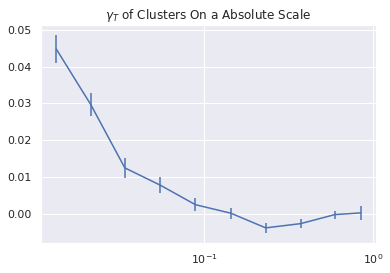

[-30.3899 -42.7478 -28.3401 -28.8934 -14.8435  -1.0505  56.7242  53.2142
   5.7698  -1.2581]
------------------------------------------------------------------------------
[ -2936.8047  -5563.4936  -7719.8638 -10879.993  -14893.7228 -19165.0484
 -21385.7942 -19212.5842 -10788.648   -1082.0708]
------------------------------------------------------------------------------
[  679.  1444.  2278.  3749.  6147.  9882. 14611. 19467. 20772.  6531.]
------------------------------------------------------------------------------
[-0.0448 -0.0296 -0.0124 -0.0077 -0.0024 -0.0001  0.0039  0.0027  0.0003
 -0.0002]
------------------------------------------------------------------------------
[-4.3252 -3.8528 -3.3889 -2.9021 -2.4229 -1.9394 -1.4637 -0.9869 -0.5194
 -0.1657]
------------------------------------------------------------------------------


In [19]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_T$ of Clusters On a Absolute Scale ")
for data  in sum_abs:
    print(data)
    print(sep)
for data in mean_abs:
    print(data)
    print(sep)

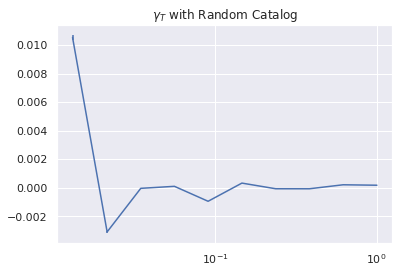

[ 1.0530e-02 -3.0813e-03 -3.2829e-05  1.0766e-04 -9.3823e-04  3.3370e-04
 -6.2208e-05 -6.3558e-05  2.1622e-04  1.8498e-04]
[-1.7151e-04  5.0191e-05  5.3475e-07 -1.7537e-06  1.5283e-05 -5.4356e-06
  1.0133e-06  1.0353e-06 -3.5220e-06 -3.0130e-06]


In [20]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_T$ with Random Catalog")
print(-r_xi)
print(r_sigma)

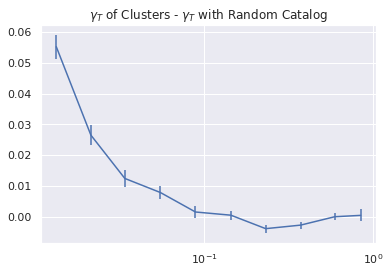

In [21]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_T$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

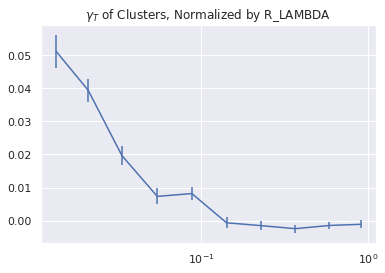

[-19.15   -39.3065 -37.1948 -21.3965 -39.0464   5.3848  18.8124  42.2339
  31.6305  19.1888]
------------------------------------------------------------------------------
[ -1607.5883  -3846.3817  -6411.3704  -8511.6732 -11610.8687 -15219.4001
 -17895.9132 -17140.5786 -11236.8978  -1688.9721]
------------------------------------------------------------------------------
[  374.   997.  1889.  2929.  4780.  7802. 12127. 17083. 21095. 16587.]
------------------------------------------------------------------------------
[-0.0512 -0.0394 -0.0197 -0.0073 -0.0082  0.0007  0.0016  0.0025  0.0015
  0.0012]
------------------------------------------------------------------------------
[-4.2984 -3.858  -3.3941 -2.906  -2.4291 -1.9507 -1.4757 -1.0034 -0.5327
 -0.1018]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [22]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_T$ of Clusters, Normalized by R_LAMBDA")
for data  in sum_rel:
    print(data)
    print(sep)
for data in mean_rel:
    print(data)
    print(sep)